# Plotting GDM Models

There are two options for plotting GDM models:

1. **Using the `plot` Function**  
   This returns an interactive Plotly plot with detailed information displayed on hover.

2. **Plotting from a GeoDataFrame**  
   Export the model to a GeoDataFrame and use standard geospatial plotting libraries (e.g., GeoPandas or Matplotlib) for visualization.

We start by loading a sample distribution system.


In [1]:
from gdm.distribution import DistributionSystem
from gdmloader.constants import GCS_CASE_SOURCE
from gdmloader.source import SystemLoader
from IPython.display import display, HTML
import plotly.io as pio

pio.renderers.default = "notebook_connected"

gdm_loader = SystemLoader()
gdm_loader.add_source(GCS_CASE_SOURCE)

distribution_system: DistributionSystem = gdm_loader.load_dataset(
    source_name=GCS_CASE_SOURCE.name,
    system_type=DistributionSystem,
    dataset_name="p1rhs7_1247",
)
distribution_system.name = "p1rhs7_1247"
distribution_system.info()

/opt/homebrew/Caskroom/miniconda/base/envs/gdm2/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:502: UserWarning: Ellipsis is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


System                                
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Property             ┃       Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ System name          │ p1rhs7_1247 │
│ Data format version  │       2.0.1 │
│ Components attached  │       13370 │
│ Time Series attached │           0 │
│ Description          │             │
└──────────────────────┴─────────────┘

Component Information                       
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Type                             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ DistributionBus                  │  2510 │
│ DistributionLoad                 │  1896 │
│ DistributionTransformer          │   503 │
│ DistributionTransformerEquipment │    10 │
│ DistributionVoltageSource        │     1 │
│ LoadEquipment                    │  1896 │
│ Location                         │  2510 │
│ MatrixImpedanceBranch            │  1841 │
│ MatrixImpedanceBranchEquipment   │    38 │
│ MatrixImpedanceFuse              │    81 │
│ MatrixImpedanceFuseEquipment     │     6 │
│ MatrixImpedanceSwitch            │    84 │
│ MatrixImpedanceSwitchEquipment   │    15 │
│ PhaseLoadEquipment               │  1948 │
│ PhaseVoltageSourceEquipment      │     3 │
│ TimeCurrentCurve                 │     1 │
│ VoltageLimitSet                  │     8 │
│ VoltageSourceEquipment           │     1 │
│ WindingEquipment                 │    18 │
└──────────────────────────────────┴───────┘

## Plotting using Plotly

In [ ]:
fig = distribution_system.plot(
    flip_coordinates=True,
    show=False, 
)
display(HTML(pio.to_html(fig, include_plotlyjs="cdn", full_html=False)))

ValueError: 
The fig parameter must be a dict or Figure.
    Received value of type <class 'NoneType'>: None

In [ ]:
from gdm.distribution.enums import MapType, PlotingStyle

fig = distribution_system.plot(
    map_type=MapType.SCATTER_MAP, 
    style=PlotingStyle.OPEN_STREET_MAP, 
    flip_coordinates=True,
    show=False
)
display(HTML(pio.to_html(fig, include_plotlyjs="cdn", full_html=False)))

In [ ]:
distribution_system.plot(
    map_type=MapType.SCATTER_MAP, 
    style=PlotingStyle.CARTO_DARKMATTER,  
    flip_coordinates=True,
    show=False
)
display(HTML(pio.to_html(fig, include_plotlyjs="cdn", full_html=False)))

In [ ]:
fig = distribution_system.plot(
    map_type=MapType.SCATTER_MAP, 
    style=PlotingStyle.CARTO_POSITRON, 
    flip_coordinates=True,
    show=False
)
display(HTML(pio.to_html(fig, include_plotlyjs="cdn", full_html=False)))

Distribution system plots can be styled by passing plotting options to the function to customize their appearance.


In [ ]:
from gdm.distribution.enums import ColorNodeBy, ColorLineBy

distribution_system.plot(
    color_node_by=ColorNodeBy.VOLTAGE_LEVEL, 
    color_line_by=ColorLineBy.PHASE,
    flip_coordinates=True,
)
display(HTML(pio.to_html(fig, include_plotlyjs="cdn", full_html=False)))

ValueError: 
The fig parameter must be a dict or Figure.
    Received value of type <class 'NoneType'>: None

<Axes: >

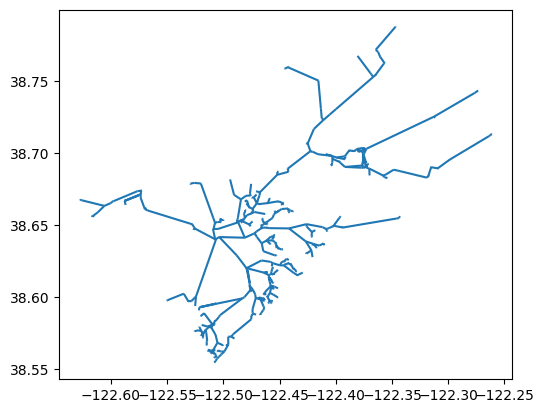

In [ ]:
## Plotting using Matplotlib

df = distribution_system.to_gdf()
df.plot()